# IBM Applied Data Science Capstone Course by Coursera

### *Exploring the Food Culture and Diversity of Gurgaon, India*

### Download Libraries

In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geocoder 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### Data collection and pre-processing

In [10]:
# We exctract the data using web scrapping packages

data = requests.get("https://www.mapsofindia.com/pincode/india/haryana/gurgaon/").text

In [11]:
soup = BeautifulSoup(data, 'html.parser')

In [12]:
data=soup.table

In [13]:
#Let's see the total number of rows in the table

results=data.find_all('tr')
nrows=len(results)
nrows 

168

In [14]:
#Let's see what the first row contains

header=results[1].text.split('b')
header


['LocationPincode State District ']

In [15]:
import regex as re    #We will need this package to extract the data from the table

In [16]:
re.findall('[A-Z][^A-Z]*',str(header) )

['Location', 'Pincode ', 'State ', "District ']"]

In [17]:
results[3].text.split()

['Air', 'Force122105', 'HaryanaGurgaon']

In [18]:
re.findall(r"[^\W\d_]+|\d+",str(results[3].text))

['Air', 'Force', '122105', 'HaryanaGurgaon']

In [19]:
#Let's assign variable Postcode to the postcode

Postcode=re.findall(r"[^\W\d_]+|\d+",str(results[85].text))[1]
Postcode

'123414'

In [20]:
#Let's assign variable Neighborhood to the Neighborhood

Neighborhood=re.findall(r"[^\W\d_]+|\d+",str(results[85].text))[0]
Neighborhood

'Khor'

In [21]:
#We will write a code to extract all rows from the table to a dataframe

records =[]
n=2
while n < nrows :
    if len(re.findall(r"[^\W\d_]+|\d+",str(results[n].text)))==3:
        Neighborhood=re.findall(r"[^\W\d_]+|\d+",str(results[n].text))[0]
        Postcode=re.findall(r"[^\W\d_]+|\d+",str(results[n].text))[1]
   
    elif len(re.findall(r"[^\W\d_]+|\d+",str(results[n].text)))==4:
        Neighborhood=re.findall(r"[^\W\d_]+|\d+",str(results[n].text))[0]+re.findall(r"[^\W\d_]+|\d+",str(results[n].text))[1]
        Postcode=re.findall(r"[^\W\d_]+|\d+",str(results[n].text))[2]
   
    records.append((Postcode,Neighborhood))
    n=n+1

df=pd.DataFrame(records, columns=['PostalCode', 'Neighbourhood'])
df

,PostalCode,Neighbourhood
0,122104,Agon
1,122105,AirForce
2,122107,Akhera
3,122001,ArjunNagar
4,121104,Baded
5,121104,Badli
6,122101,Badshahpur
7,122105,Baghanki
8,122006,Basai
9,122001,BasaiRoad


In [22]:
#Let's create a checkpoint

df1=df.copy()

In [23]:
#After eyeballing the data we see that there are duplicates,let's remove them

df1.drop_duplicates(subset=None, keep='first', inplace=True)
df1

,PostalCode,Neighbourhood
0,122104,Agon
1,122105,AirForce
2,122107,Akhera
3,122001,ArjunNagar
4,121104,Baded
5,121104,Badli
6,122101,Badshahpur
7,122105,Baghanki
8,122006,Basai
9,122001,BasaiRoad


In [24]:
#We see that some values look different,let's fix that!

df1.loc[132,'PostalCode'] = 122011
df1.loc[132,'Neighbourhood']='sec56'
df1.loc[133,'PostalCode']=122003
df1.loc[133,'Neighbourhood']='sec45'
df1.loc[134,'PostalCode']=122001
df1.loc[134,'Neighbourhood']='sec17'
df1.reset_index(drop=True, inplace=True)

In [25]:
df1

,PostalCode,Neighbourhood
0,122104,Agon
1,122105,AirForce
2,122107,Akhera
3,122001,ArjunNagar
4,121104,Baded
5,121104,Badli
6,122101,Badshahpur
7,122105,Baghanki
8,122006,Basai
9,122001,BasaiRoad


In [26]:
#We create another checkpoint

df_cleaned=df1.copy()

In [27]:
df_cleaned.shape

(158, 2)

In [28]:

# define a function to get coordinates
def get_latlng(neighbourhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Gurgaon,India'.format(neighbourhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [29]:
#We need to keep running this code till we get the coordinates as it gives error sometimes

coords = [ get_latlng(neighbourhood) for neighbourhood in df_cleaned["Neighbourhood"].tolist() ]

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


KeyboardInterrupt: 

In [ ]:
coords

In [ ]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [ ]:
# merge the coordinates into the original dataframe
df_cleaned['Latitude'] = df_coords['Latitude']
df_cleaned['Longitude'] = df_coords['Longitude']

In [ ]:
# check the neighborhoods and the coordinates
print(df_cleaned.shape)
df_cleaned

In [ ]:
df_latlong=df_cleaned.copy()

In [ ]:
# save the DataFrame as CSV file
df_latlong.to_csv("df_latlong.csv", index=False)

In [31]:
#You can directly install this file and load it if the above code gives a problem

df_latlong=pd.read_csv('df_latlong.csv')
df_latlong.head()

,PostalCode,Neighbourhood,Latitude,Longitude
0,122104,Agon,28.46219,77.02373
1,122105,AirForce,28.47762,77.06952
2,122107,Akhera,28.47762,77.06952
3,122001,ArjunNagar,28.45965,77.02004
4,121104,Baded,28.47762,77.06952


### Create a map of Gurgaon

In [33]:
# get the coordinates of Gurgaon,India
address = 'Gurgaon, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Gurgaon, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Gurgaon, India 28.42826235, 77.00270014657752.


In [34]:
# create map of Gurgaon using latitude and longitude values
map_ggn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df_latlong['Latitude'], df_latlong['Longitude'], df_latlong['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ggn)  
    
map_ggn

We see that most of the cluster is concentrated at the center of Gurgaon!

### Using Foursquare API to explore food venues

In [35]:

# define Foursquare Credentials and Version
CLIENT_ID = 'GYQ0MSHFXOYZBXMEAY00HOKEIGXRUK1AAEBY2RCNYBT2VEZR' # your Foursquare ID
CLIENT_SECRET = '0J3SU22TQTQ3TVWN144UIS4RJKDB3N1ZPPFZOYFEBPPKJCYR' # your Foursquare Secret
VERSION = '20200201' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GYQ0MSHFXOYZBXMEAY00HOKEIGXRUK1AAEBY2RCNYBT2VEZR
CLIENT_SECRET:0J3SU22TQTQ3TVWN144UIS4RJKDB3N1ZPPFZOYFEBPPKJCYR


In [37]:
radius = 4000
LIMIT = 100


venues = []

for lat, long, neighbourhood in zip(df_latlong['Latitude'], df_latlong['Longitude'], df_latlong['Neighbourhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT
        )
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighbourhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [38]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighbourhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(7076, 7)


,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Agon,28.46219,77.02373,Cocktails and Dreams Speakeasy,28.457921,77.044597,Bar
1,Agon,28.46219,77.02373,Bikanerwala,28.469620,77.036283,Indian Restaurant
2,Agon,28.46219,77.02373,The Monk,28.463142,77.049037,Chinese Restaurant
3,Agon,28.46219,77.02373,INOX,28.472378,77.017783,Multiplex
4,Agon,28.46219,77.02373,The World Spa,28.460302,77.058074,Residential Building (Apartment / Condo)


In [39]:
#We see how many venues are returned

venues_df.groupby(["Neighbourhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighbourhood,,,,,,
Agon,82,82,82,82,82,82
AirForce,100,100,100,100,100,100
Akhera,100,100,100,100,100,100
ArjunNagar,49,49,49,49,49,49
Baded,100,100,100,100,100,100
Badli,5,5,5,5,5,5
Badshahpur,40,40,40,40,40,40
Baghanki,6,6,6,6,6,6
Basai,9,9,9,9,9,9


In [42]:
#Let's create another checkpoint

venues_all=venues_df.copy()

In [43]:
venues_df.head()

,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Agon,28.46219,77.02373,Cocktails and Dreams Speakeasy,28.457921,77.044597,Bar
1,Agon,28.46219,77.02373,Bikanerwala,28.469620,77.036283,Indian Restaurant
2,Agon,28.46219,77.02373,The Monk,28.463142,77.049037,Chinese Restaurant
3,Agon,28.46219,77.02373,INOX,28.472378,77.017783,Multiplex
4,Agon,28.46219,77.02373,The World Spa,28.460302,77.058074,Residential Building (Apartment / Condo)


In [40]:
#Let's see the number of venue categories

print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 122 uniques categories.


In [134]:
# print out the list of categories
unique_categories=venues_df['VenueCategory'].unique()
unique_categories

array(['Bar', 'Indian Restaurant', 'Chinese Restaurant', 'Multiplex',
       'Residential Building (Apartment / Condo)', 'Clothing Store',
       'Donut Shop', 'Hotel', 'Brewery', 'Nightclub', 'Gym',
       'Fast Food Restaurant', 'Sandwich Place', 'Thai Restaurant',
       'Lounge', 'Diner', 'Pizza Place', 'Indian Sweet Shop',
       'Brazilian Restaurant', 'Café', 'Mughlai Restaurant', 'Bakery',
       'Deli / Bodega', 'Korean Restaurant', 'Market', 'Coffee Shop',
       'Food Truck', 'Tea Room', 'Restaurant', 'Dessert Shop',
       'Department Store', 'Park', 'General Entertainment', 'Pub',
       'Italian Restaurant', 'Bagel Shop', 'Asian Restaurant', 'Plaza',
       'Falafel Restaurant', 'American Restaurant', 'Burger Joint',
       'Tapas Restaurant', 'Bistro', 'Burmese Restaurant',
       'Middle Eastern Restaurant', 'Gastropub', 'Hotel Bar', 'Resort',
       'Bowling Alley', 'Bed & Breakfast', 'Seafood Restaurant',
       'Portuguese Restaurant', 'Athletics & Sports', 'Recreati

In [44]:
#These are the non-food categories

non_food_rows = ['Bar','Multiplex','Residential Building (Apartment / Condo)','Clothing Store',
                            'Hotel', 'Brewery', 'Nightclub', 'Gym','Lounge','Market','Department Store',
                            'Park', 'General Entertainment', 'Pub','Plaza','Hotel Bar', 'Resort',
                            'Bowling Alley','Athletics & Sports', 'Recreation Center','Pool', 'Office',
                            'Sporting Goods Shop','Movie Theater', 'Garden','Recording Studio', 
                            'Tourist Information Center', 'Shopping Mall','Supermarket', 'Grocery Store', 'Tennis Court',
                            'Golf Course','Museum', 'ATM','Motorcycle Shop', 'Train Station','Nature Preserve', 'Farm', 
                            'Road',  'Trail', 'Whisky Bar', 'Bookstore', 'Lake', 'Campground', 'Rock Climbing Spot',
                            'Business Service', 'Cricket Ground', 'Airport Lounge', 'Bank','Bathing Area', 'Auto Garage',
                            'Spa','Arcade', 'Platform','Toll Booth', 'Moving Target', 'Paper / Office Supplies Store',
                            'Art Gallery','Furniture / Home Store', 'Dry Cleaner', 'Boutique', 'Night Market', 'Mountain',
                            'Pool Hall','Convenience Store','Metro Station','Boat or Ferry','Liquor Store']
       

In [45]:
food_categories =  list(set(unique_categories) - set(non_food_rows))

In [46]:
food_categories

['Bagel Shop',
 'Tibetan Restaurant',
 'Gujarati Restaurant',
 'Coffee Shop',
 'Dessert Shop',
 'Liquor Store',
 'Bakery',
 'American Restaurant',
 'Multicuisine Indian Restaurant',
 'Pizza Place',
 'Falafel Restaurant',
 'Italian Restaurant',
 'Food Court',
 'Gastropub',
 'Fast Food Restaurant',
 'North Indian Restaurant',
 'Brazilian Restaurant',
 'Moroccan Restaurant',
 'Ice Cream Shop',
 'Buffet',
 'Farmers Market',
 'Sandwich Place',
 'Tea Room',
 'Burmese Restaurant',
 'Indian Restaurant',
 'Seafood Restaurant',
 'Juice Bar',
 'Speakeasy',
 'BBQ Joint',
 'Bed & Breakfast',
 'Dhaba',
 'Indian Sweet Shop',
 'Café',
 'Burger Joint',
 'French Restaurant',
 'Thai Restaurant',
 'Food Truck',
 'Diner',
 'Fried Chicken Joint',
 'Donut Shop',
 'Asian Restaurant',
 'Mughlai Restaurant',
 'Bistro',
 'Snack Place',
 'Portuguese Restaurant',
 'Food',
 'Vegetarian / Vegan Restaurant',
 'Breakfast Spot',
 'Tapas Restaurant',
 'Restaurant',
 'Chinese Restaurant',
 'Deli / Bodega',
 'Korean Resta

In [47]:
#We remove the Venues with non-food categories

venues_food = venues_df[venues_df['VenueCategory'].isin(food_categories)]
venues_food.head(5)

,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1,Agon,28.46219,77.02373,Bikanerwala,28.469620,77.036283,Indian Restaurant
2,Agon,28.46219,77.02373,The Monk,28.463142,77.049037,Chinese Restaurant
6,Agon,28.46219,77.02373,Dunkin',28.443370,77.055967,Donut Shop
10,Agon,28.46219,77.02373,Swagath Restaurant & Bar,28.469983,77.062932,Indian Restaurant
12,Agon,28.46219,77.02373,21 Gun Salute,28.468323,77.063174,Indian Restaurant


In [48]:
venues_food.reset_index(inplace=True,drop=True)
venues_food.head()

,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Agon,28.46219,77.02373,Bikanerwala,28.469620,77.036283,Indian Restaurant
1,Agon,28.46219,77.02373,The Monk,28.463142,77.049037,Chinese Restaurant
2,Agon,28.46219,77.02373,Dunkin',28.443370,77.055967,Donut Shop
3,Agon,28.46219,77.02373,Swagath Restaurant & Bar,28.469983,77.062932,Indian Restaurant
4,Agon,28.46219,77.02373,21 Gun Salute,28.468323,77.063174,Indian Restaurant


In [281]:
ggn_hubVenues.shape

(4004, 7)

In [49]:
#Let's see the number of unique food categories

print('There are {} unique FOOD categories.'.format(len(venues_food['VenueCategory'].unique())))

There are 55 unique FOOD categories.


In [50]:
#We have removed 3029 non-food venues

venues_food.shape

(4047, 7)

In [51]:
df_food=venues_food.copy()

In [52]:
# save the DataFrame as CSV file
df_food.to_csv("df_food.csv", index=False)

In [54]:
#Let's see the number of unique venues

print('There are {} uniques venues.'.format(len(df_food['VenueName'].unique())))

There are 182 uniques venues.


### Exploratory Analysis

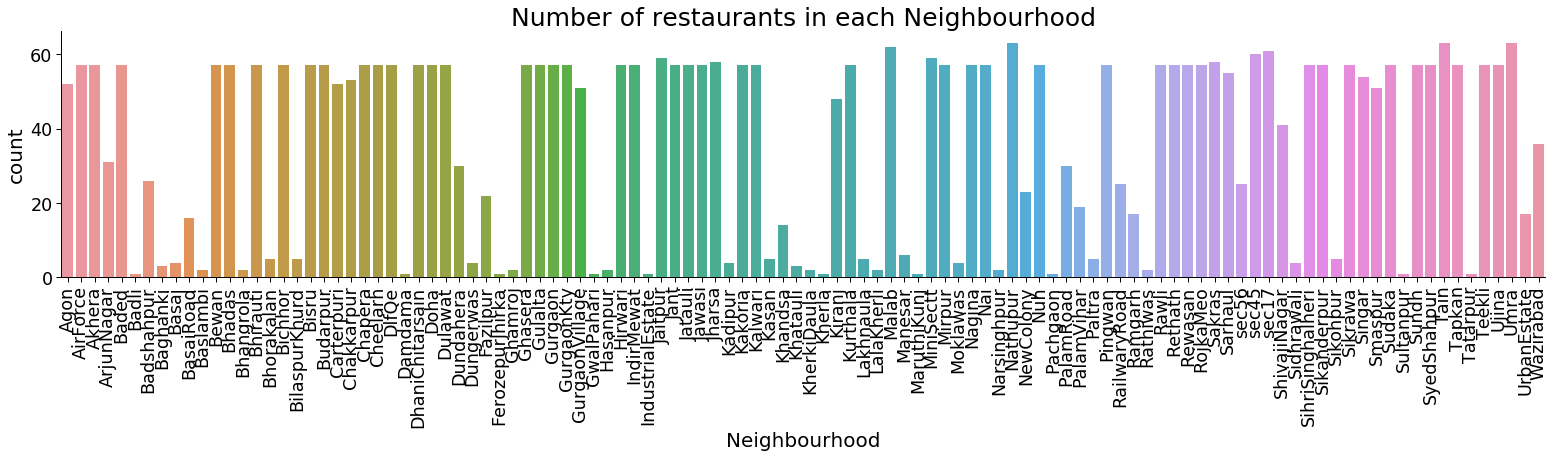

In [274]:
#Number of restaurants in each neigbourhood

sns.set_context("paper", font_scale = 2, rc={"font.size": 30,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df_food, kind = 'count', x = 'Neighbourhood',aspect=4.5)
plt.title('Number of restaurants in each Neighbourhood')
b.set_xticklabels(rotation = 90)
plt.show()

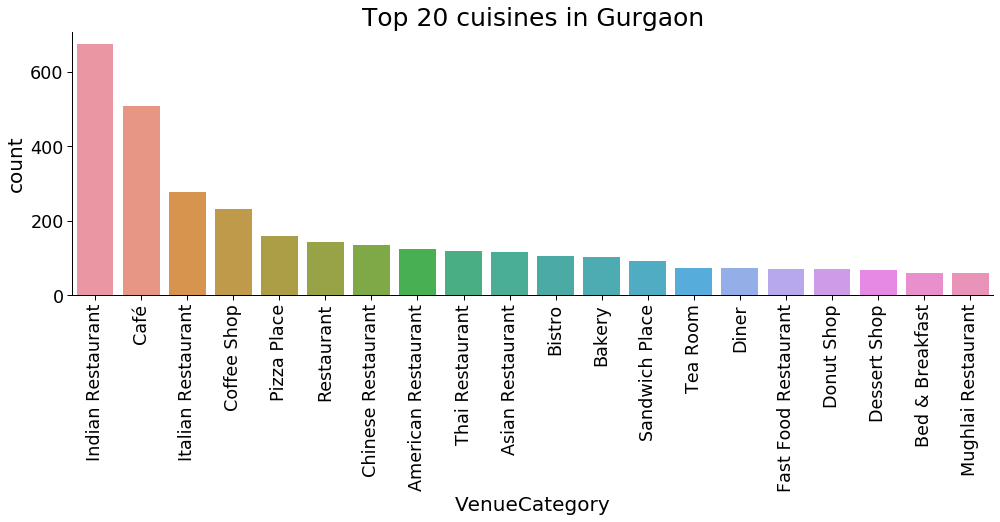

In [184]:
#count plot of top 20 cuisines in Gurgaon

sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df_food, kind = 'count', x = 'VenueCategory', order =  df_food['VenueCategory'].value_counts().head(20).index,aspect=3)
plt.title('Top 20 cuisines in Gurgaon')
b.set_xticklabels(rotation = 90)
plt.show()

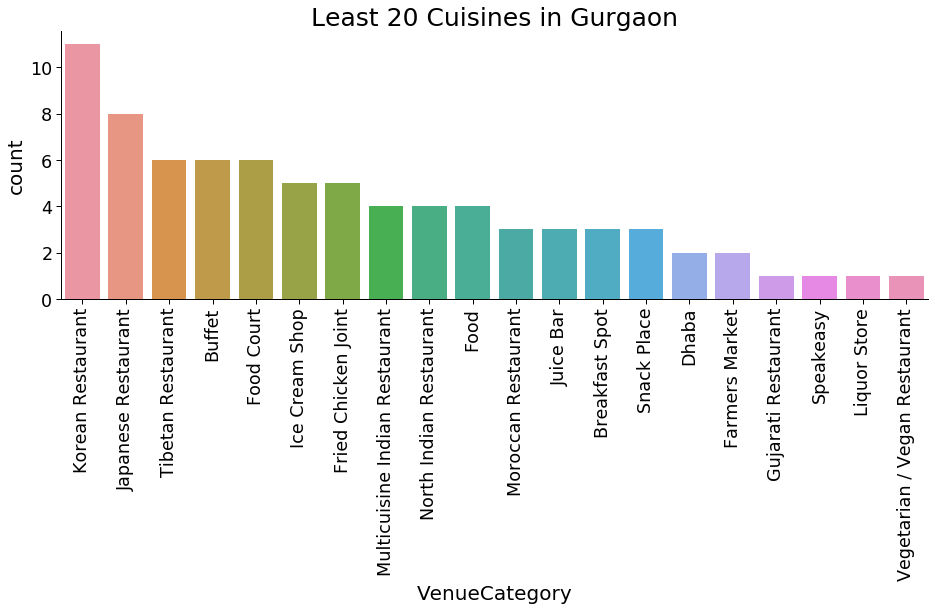

In [185]:
##count plot of least 20 cuisines in Gurgaon

sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df_food, kind = 'count', x = 'VenueCategory', order =  df_food['VenueCategory'].value_counts().tail(20).index,aspect=3)
plt.title('Least 20 Cuisines in Gurgaon')
b.set_xticklabels(rotation = 90)
plt.show()

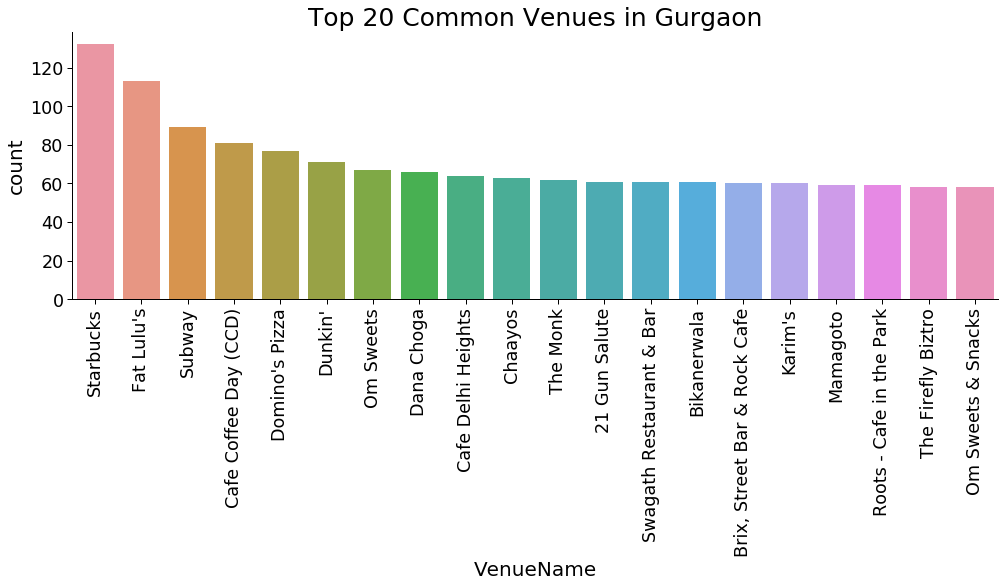

In [186]:
#count plot of top 20 common venues in Gurgaon

sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df_food, kind = 'count', x = 'VenueName', order =  df_food['VenueName'].value_counts().head(20).index,aspect=3)
plt.title('Top 20 Common Venues in Gurgaon')
b.set_xticklabels(rotation = 90)
plt.show()

### Analysis of Neighbourhoods

In [67]:
#We do one-hot encoding

ggn_onehot = pd.get_dummies(df_food[['VenueCategory']], prefix="", prefix_sep="")
ggn_onehot.head()

,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bed & Breakfast,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dessert Shop,Dhaba,Diner,Donut Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gujarati Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Middle Eastern Restaurant,Moroccan Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Speakeasy,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# add neighborhood column back to dataframe
ggn_onehot['Neighbourhood'] = df_food['Neighbourhood'] 
ggn_onehot.head()

,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bed & Breakfast,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dessert Shop,Dhaba,Diner,Donut Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gujarati Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Middle Eastern Restaurant,Moroccan Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Speakeasy,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agon
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agon
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agon
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agon
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agon


In [69]:
# move neighborhood column to the first column
Neighbourhood = ggn_onehot['Neighbourhood']

ggn_onehot.drop(labels=['Neighbourhood'], axis=1,inplace = True)
ggn_onehot.insert(0, 'Neighbourhood', Neighbourhood)

ggn_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bed & Breakfast,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dessert Shop,Dhaba,Diner,Donut Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gujarati Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Middle Eastern Restaurant,Moroccan Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Speakeasy,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant
0,Agon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agon,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
ggn_onehot.shape

(4047, 56)

In [72]:
#Let's count venues of each category in each neighbourhood

venue_counts = ggn_onehot.groupby('Neighbourhood').sum()
venue_counts.head(5)

,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bed & Breakfast,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dessert Shop,Dhaba,Diner,Donut Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gujarati Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Middle Eastern Restaurant,Moroccan Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Speakeasy,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant
Neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agon,0,0,0,0,2,0,0,1,0,0,0,0,8,4,6,1,1,0,1,1,0,0,3,0,0,1,0,0,0,0,0,10,1,0,0,0,1,0,0,0,1,0,0,6,0,1,1,0,0,0,0,1,1,0,0
AirForce,2,2,1,1,1,1,2,0,0,0,1,1,7,2,3,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,9,1,5,0,0,0,0,1,0,1,0,0,1,1,2,1,1,0,0,1,1,2,0,0
Akhera,2,2,1,1,1,1,2,0,0,0,1,1,7,2,3,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,9,1,5,0,0,0,0,1,0,1,0,0,1,1,2,1,1,0,0,1,1,2,0,0
ArjunNagar,0,0,0,0,2,0,0,1,0,0,0,0,5,1,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,6,1,0,0,0,0,0,0,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,0
Baded,2,2,1,1,1,1,2,0,0,0,1,1,7,2,3,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,9,1,5,0,0,0,0,1,0,1,0,0,1,1,2,1,1,0,0,1,1,2,0,0


In [73]:
#Let's find out the top 10 food categories in Gurgaon

venue_counts_described = venue_counts.describe().transpose()
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Indian Restaurant,110.0,6.127273,3.937841,0.0,1.25,9.0,9.0,12.0
Café,110.0,4.627273,3.289848,0.0,1.00,7.0,7.0,11.0
Pizza Place,110.0,1.445455,1.705826,0.0,1.00,1.0,1.0,9.0
Coffee Shop,110.0,2.100000,1.691587,0.0,0.00,3.0,3.0,7.0
Italian Restaurant,110.0,2.509091,2.425951,0.0,0.00,2.5,5.0,6.0
Sandwich Place,110.0,0.836364,0.903888,0.0,0.00,1.0,1.0,5.0
Fast Food Restaurant,110.0,0.645455,1.238424,0.0,0.00,0.0,1.0,5.0
American Restaurant,110.0,1.118182,1.178802,0.0,0.00,1.0,2.0,5.0
Bakery,110.0,0.936364,0.880755,0.0,0.00,1.0,1.0,5.0
Chinese Restaurant,110.0,1.236364,0.985466,0.0,0.00,2.0,2.0,4.0


In [74]:
#Let'smake a list of the top 10 categories
venue_top10_list = venue_top10.index.values.tolist()

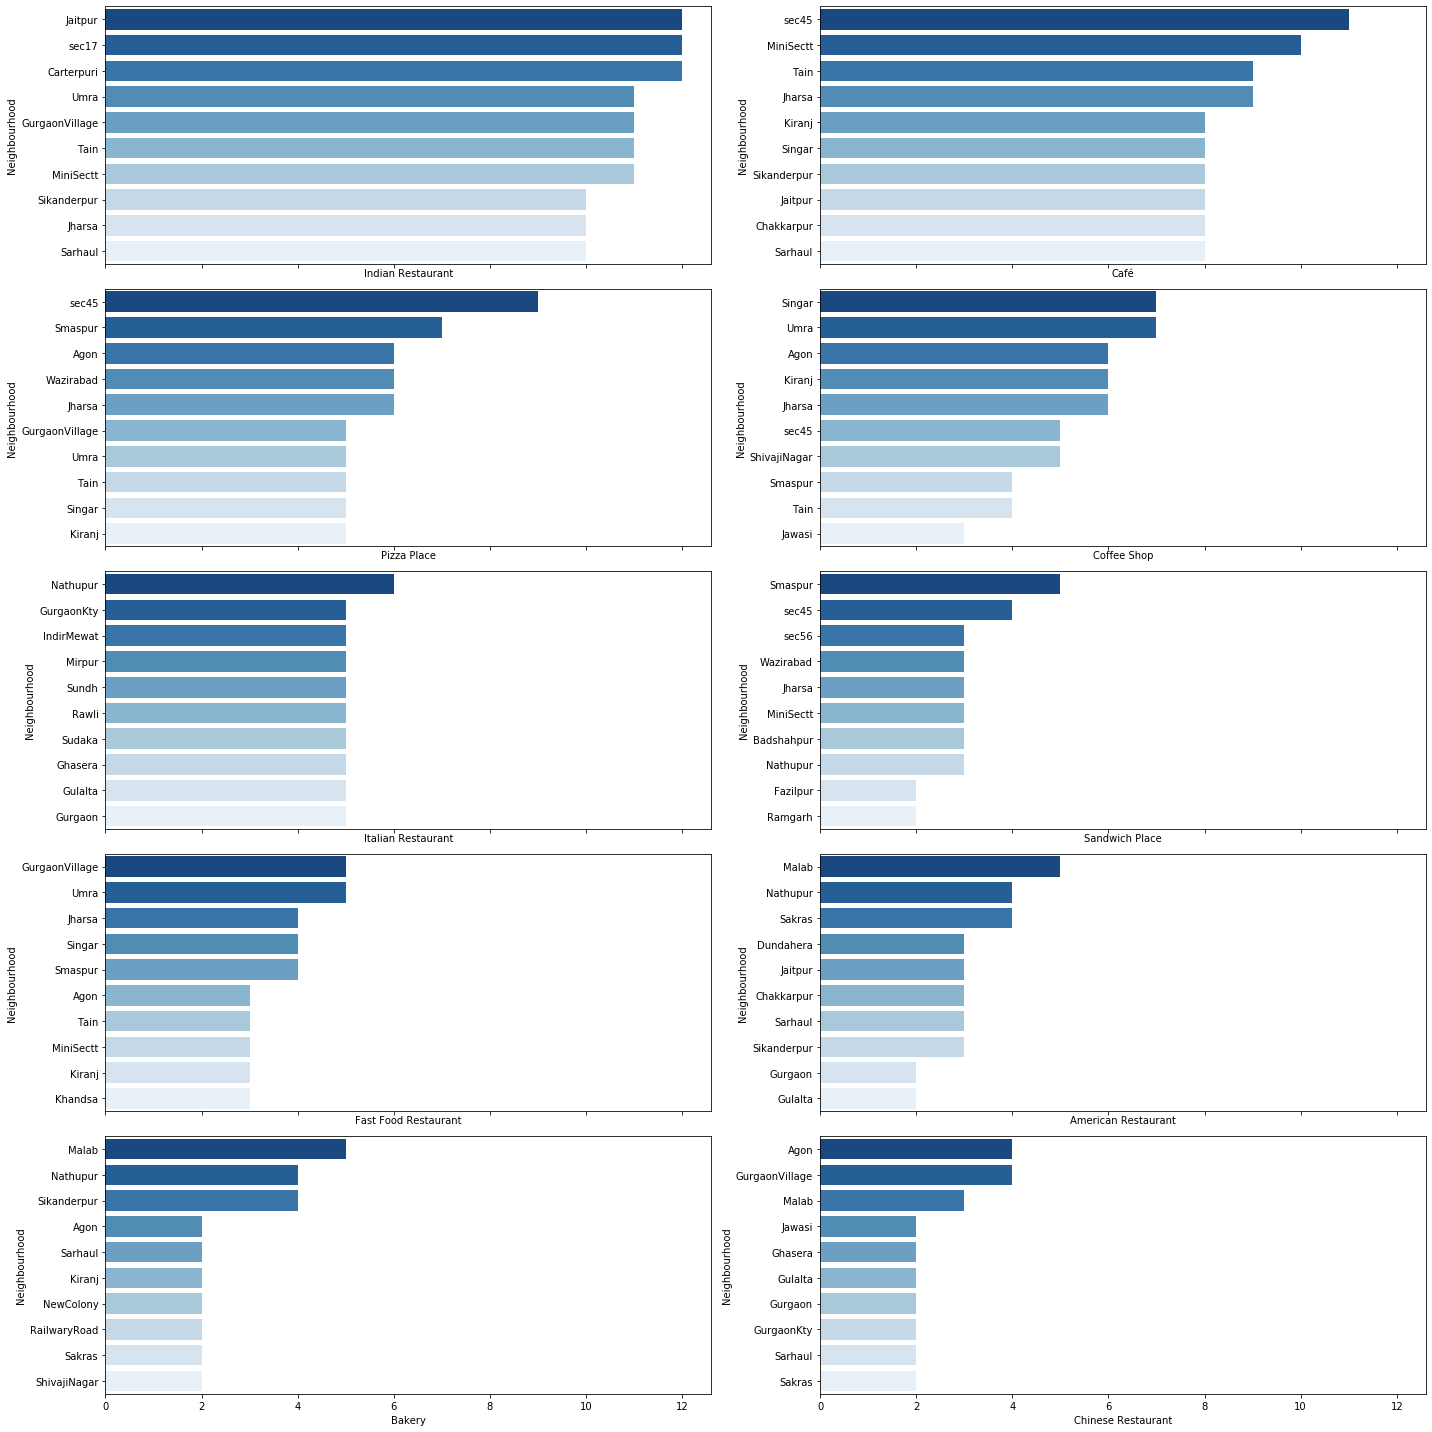

In [75]:
#Let's plot the top 10 categories individually on bar graphs

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

In [76]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

ggn_grouped = ggn_onehot.groupby('Neighbourhood').mean().reset_index()
ggn_grouped.head()

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bed & Breakfast,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dessert Shop,Dhaba,Diner,Donut Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gujarati Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Middle Eastern Restaurant,Moroccan Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Speakeasy,Tapas Restaurant,Tea Room,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant
0,Agon,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.019231,0.0,0.0,0.000000,0.000000,0.153846,0.076923,0.115385,0.019231,0.019231,0.0,0.019231,0.019231,0.000000,0.0,0.057692,0.0,0.0,0.019231,0.000000,0.0,0.000000,0.0,0.0,0.192308,0.019231,0.000000,0.0,0.0,0.019231,0.0,0.000000,0.0,0.019231,0.0,0.0,0.115385,0.000000,0.019231,0.019231,0.000000,0.0,0.0,0.000000,0.019231,0.019231,0.0,0.0
1,AirForce,0.035088,0.035088,0.017544,0.017544,0.017544,0.017544,0.035088,0.000000,0.0,0.0,0.017544,0.017544,0.122807,0.035088,0.052632,0.000000,0.017544,0.0,0.017544,0.017544,0.017544,0.0,0.000000,0.0,0.0,0.000000,0.017544,0.0,0.017544,0.0,0.0,0.157895,0.017544,0.087719,0.0,0.0,0.000000,0.0,0.017544,0.0,0.017544,0.0,0.0,0.017544,0.017544,0.035088,0.017544,0.017544,0.0,0.0,0.017544,0.017544,0.035088,0.0,0.0
2,Akhera,0.035088,0.035088,0.017544,0.017544,0.017544,0.017544,0.035088,0.000000,0.0,0.0,0.017544,0.017544,0.122807,0.035088,0.052632,0.000000,0.017544,0.0,0.017544,0.017544,0.017544,0.0,0.000000,0.0,0.0,0.000000,0.017544,0.0,0.017544,0.0,0.0,0.157895,0.017544,0.087719,0.0,0.0,0.000000,0.0,0.017544,0.0,0.017544,0.0,0.0,0.017544,0.017544,0.035088,0.017544,0.017544,0.0,0.0,0.017544,0.017544,0.035088,0.0,0.0
3,ArjunNagar,0.000000,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000,0.032258,0.0,0.0,0.000000,0.000000,0.161290,0.032258,0.096774,0.000000,0.032258,0.0,0.000000,0.032258,0.000000,0.0,0.032258,0.0,0.0,0.032258,0.000000,0.0,0.000000,0.0,0.0,0.193548,0.032258,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.032258,0.0,0.0,0.129032,0.000000,0.032258,0.032258,0.000000,0.0,0.0,0.000000,0.032258,0.000000,0.0,0.0
4,Baded,0.035088,0.035088,0.017544,0.017544,0.017544,0.017544,0.035088,0.000000,0.0,0.0,0.017544,0.017544,0.122807,0.035088,0.052632,0.000000,0.017544,0.0,0.017544,0.017544,0.017544,0.0,0.000000,0.0,0.0,0.000000,0.017544,0.0,0.017544,0.0,0.0,0.157895,0.017544,0.087719,0.0,0.0,0.000000,0.0,0.017544,0.0,0.017544,0.0,0.0,0.017544,0.017544,0.035088,0.017544,0.017544,0.0,0.0,0.017544,0.017544,0.035088,0.0,0.0


In [78]:
ggn_grouped.shape

(110, 56)

In [79]:
#Let's write a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Neighborhood food habits can be defined by the top 5 venues in its vicinity

In [86]:
#Now let's create the new dataframe and display the top 5 venues for each neighborhood.

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1)) 

In [87]:
# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = ggn_grouped['Neighbourhood']

In [90]:
for ind in np.arange(ggn_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ggn_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agon,Indian Restaurant,Café,Pizza Place,Coffee Shop,Chinese Restaurant
1,AirForce,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant
2,Akhera,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant
3,ArjunNagar,Indian Restaurant,Café,Pizza Place,Coffee Shop,Bakery
4,Baded,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant


### Cluster Neighborhoods

*Run k-means to count Neighborhoods for each cluster label for variable cluster size*

In [91]:
ggn_grouped_clustering =ggn_grouped.drop('Neighbourhood', 1)

#### Determine the optimal number of clusters for k-means clustering

**The Elbow Method** - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen

In [92]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(ggn_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

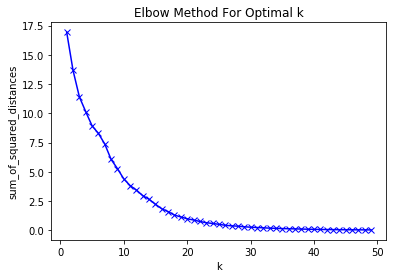

In [93]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.

**The Silhouette Method** - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). 

In [95]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(ggn_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(ggn_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

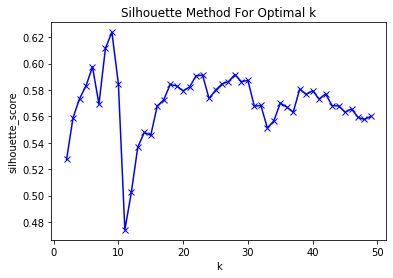

In [96]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 8, hence we will set the number of clusters to 8

In [101]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(ggn_grouped_clustering)



In [107]:
from collections import Counter
print(Counter(kmeans.labels_))

Counter({0: 88, 1: 11, 3: 3, 7: 2, 6: 2, 4: 2, 5: 1, 2: 1})


Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood

In [102]:
# add clustering labels
try:
    neighbourhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [106]:
neighbourhoods_venues_sorted.head(10)

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Agon,Indian Restaurant,Café,Pizza Place,Coffee Shop,Chinese Restaurant
1,0,AirForce,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant
2,0,Akhera,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant
3,0,ArjunNagar,Indian Restaurant,Café,Pizza Place,Coffee Shop,Bakery
4,0,Baded,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant
5,1,Badli,Indian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Food Court,Food
6,0,Badshahpur,Indian Restaurant,Pizza Place,Fast Food Restaurant,Sandwich Place,Café
7,0,Baghanki,Fried Chicken Joint,North Indian Restaurant,Café,BBQ Joint,Coffee Shop
8,0,Basai,Food Truck,Fast Food Restaurant,Bakery,Pizza Place,Chinese Restaurant
9,0,BasaiRoad,Café,Pizza Place,Bakery,Indian Restaurant,Coffee Shop


In [109]:
# merge neighborhoods_venues_sorted with df_latlong to add latitude/longitude for each neighbourhood

ggn_merged = neighbourhoods_venues_sorted.join(df_latlong.set_index('Neighbourhood'), on='Neighbourhood')
ggn_merged.head()

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
0,0,Agon,Indian Restaurant,Café,Pizza Place,Coffee Shop,Chinese Restaurant,122104,28.46219,77.02373
1,0,AirForce,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant,122105,28.47762,77.06952
2,0,Akhera,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant,122107,28.47762,77.06952
3,0,ArjunNagar,Indian Restaurant,Café,Pizza Place,Coffee Shop,Bakery,122001,28.45965,77.02004
4,0,Baded,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant,121104,28.47762,77.06952


Finally, let's visualize the resulting clusters

In [110]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ggn_merged['Latitude'], ggn_merged['Longitude'], ggn_merged['Neighbourhood'], ggn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis of each Cluster

#### Cluster 0

In [115]:
cluster_0 = ggn_merged.loc[ggn_merged['Cluster Labels'] == 0, ggn_merged.columns[1:12]]
cluster_0.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
0,Agon,Indian Restaurant,Café,Pizza Place,Coffee Shop,Chinese Restaurant,122104,28.46219,77.02373
1,AirForce,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant,122105,28.47762,77.06952
2,Akhera,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant,122107,28.47762,77.06952
3,ArjunNagar,Indian Restaurant,Café,Pizza Place,Coffee Shop,Bakery,122001,28.45965,77.02004
4,Baded,Indian Restaurant,Café,Italian Restaurant,Coffee Shop,American Restaurant,121104,28.47762,77.06952


In [275]:
cluster_0['Neighbourhood']

0                  Agon
1              AirForce
2                Akhera
3            ArjunNagar
4                 Baded
6            Badshahpur
7              Baghanki
8                 Basai
9             BasaiRoad
11                Bewan
12               Bhadas
14             Bhirauti
16              Bichhor
18                Bisru
19             Budarpur
20           Carterpuri
21           Chakkarpur
22              Chapera
23             Cheelarh
25      DhaniChitarsain
26                DlfQe
27                 Doha
28              Dulawat
29            Dundahera
30            Dungerwas
31             Fazilpur
34              Ghasera
35              Gulalta
36              Gurgaon
37           GurgaonKty
38       GurgaonVillage
41              Hirwari
42           IndirMewat
44              Jaitpur
45                 Jant
46              Jatauli
47               Jawasi
48               Jharsa
49              Kadipur
50              Kakoria
51              Kalwari
52              

In [117]:
#We will focus on top 3 Venue categories

required_column_indices = [2,3,4]
required_column = [list(ggn_merged.columns.values)[i] for i in required_column_indices]

In [118]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")
    
    #We see the #1st, 
                #2nd, 
                #3rd most common venue categories.

Indian Restaurant       73
Café                     4
Fried Chicken Joint      3
Fast Food Restaurant     3
Food Truck               2
Pizza Place              2
American Restaurant      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Café                       65
Indian Restaurant           6
Pizza Place                 5
North Indian Restaurant     3
Fast Food Restaurant        3
Sandwich Place              2
Bakery                      1
Italian Restaurant          1
Japanese Restaurant         1
Coffee Shop                 1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant      50
Café                     7
Pizza Place              7
Coffee Shop              6
Indian Restaurant        4
Fast Food Restaurant     4
Bakery                   3
Sandwich Place           2
American Restaurant      2
Buffet                   2
Japanese Restaurant      1
Name: 3rd Most Common Venue, dtype: in

#### Cluster 1

In [119]:
cluster_1 = ggn_merged.loc[ggn_merged['Cluster Labels'] == 1, ggn_merged.columns[1:12]]
cluster_1.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
5,Badli,Indian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Food Court,Food,121104,28.481815,76.886449
15,Bhorakalan,Indian Restaurant,Dhaba,Vegetarian / Vegan Restaurant,French Restaurant,Food Court,123413,28.296050,76.842930
17,BilaspurKhurd,Indian Restaurant,Fried Chicken Joint,Dhaba,French Restaurant,Food Court,123413,28.289110,76.870240
32,FerozepurJhirka,Indian Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Food Court,Food,122104,27.789130,76.942970
33,Ghamroj,Indian Restaurant,Breakfast Spot,Vegetarian / Vegan Restaurant,Coffee Shop,Food Court,122102,28.325220,77.058410


In [120]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Indian Restaurant    11
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Vegetarian / Vegan Restaurant    4
Buffet                           3
Breakfast Spot                   1
Restaurant                       1
Dhaba                            1
Fried Chicken Joint              1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Vegetarian / Vegan Restaurant    6
French Restaurant                3
Restaurant                       1
Dhaba                            1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


#### Cluster 2

In [121]:
cluster_2 = ggn_merged.loc[ggn_merged['Cluster Labels'] == 2, ggn_merged.columns[1:12]]
cluster_2.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
56,Kherla,Breakfast Spot,Vegetarian / Vegan Restaurant,Chinese Restaurant,Food Court,Food,122102,28.33053,77.11045


In [122]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Breakfast Spot    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Vegetarian / Vegan Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant    1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


#### Cluster 3

In [123]:
cluster_3 = ggn_merged.loc[ggn_merged['Cluster Labels'] == 3, ggn_merged.columns[1:12]]
cluster_3.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
10,Baslambi,Snack Place,Japanese Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Food,123003,28.361830,76.866390
73,Pachgaon,Snack Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Food Court,Food,123413,28.368437,76.849373
101,Tatarpur,Snack Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Food Court,Food,123502,28.342830,76.863810


In [124]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Snack Place    3
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Vegetarian / Vegan Restaurant    2
Japanese Restaurant              1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant               2
Vegetarian / Vegan Restaurant    1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


#### Cluster 4

In [125]:
cluster_4 = ggn_merged.loc[ggn_merged['Cluster Labels'] == 4, ggn_merged.columns[1:12]]
cluster_4.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
39,GwalPahari,Café,Chinese Restaurant,Food Court,Food,Fast Food Restaurant,122003,28.42925,77.15306
54,Khatauli,Café,Restaurant,Chinese Restaurant,Food Court,Food,123414,29.27817,77.73442


In [126]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Café    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant    1
Restaurant            1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant    1
Food Court            1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


#### Cluster 5

In [127]:
cluster_5 = ggn_merged.loc[ggn_merged['Cluster Labels'] == 5, ggn_merged.columns[1:12]]
cluster_5.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
43,IndustrialEstate,Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Food Court,Food,122001,30.33527,76.88115


In [128]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Vegetarian / Vegan Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant    1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


#### Cluster 6

In [129]:
cluster_6 = ggn_merged.loc[ggn_merged['Cluster Labels'] == 6, ggn_merged.columns[1:12]]
cluster_6.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
24,Damdama,Chinese Restaurant,Vegetarian / Vegan Restaurant,Food Court,Food,Fast Food Restaurant,122102,28.30481,77.12240
60,LalaKherli,Chinese Restaurant,Gujarati Restaurant,French Restaurant,Food Court,Food,122103,28.28666,77.18166


In [130]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Chinese Restaurant    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Vegetarian / Vegan Restaurant    1
Gujarati Restaurant              1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Food Court           1
French Restaurant    1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


#### Cluster 7

In [131]:
cluster_7 = ggn_merged.loc[ggn_merged['Cluster Labels'] == 7, ggn_merged.columns[1:12]]
cluster_7.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,PostalCode,Latitude,Longitude
13,Bhangrola,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Food,123505,28.39730,76.90179
63,MaruthiKunj,Pizza Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Food Court,Food,122102,28.35942,77.07888


In [132]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place            1
Japanese Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place                      1
Vegetarian / Vegan Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant               1
Vegetarian / Vegan Restaurant    1
Name: 3rd Most Common Venue, dtype: int64
---------------------------------------------


### Further Analysis of Cluster 0

**Zomato API** has a limit of a **1000 calls per day**. So instead of using all neighbourhoods and all Venue Categories, let's use **Indian Restaurants** in the **hub of Gurgaon** (Neighbourhoods from cluster 0)

In [277]:
#Get the Neighbourhoods from cluster 0

ggn_hub=np.array(cluster_0['Neighbourhood'])
ggn_hub

array(['Agon', 'AirForce', 'Akhera', 'ArjunNagar', 'Baded', 'Badshahpur',
       'Baghanki', 'Basai', 'BasaiRoad', 'Bewan', 'Bhadas', 'Bhirauti',
       'Bichhor', 'Bisru', 'Budarpur', 'Carterpuri', 'Chakkarpur',
       'Chapera', 'Cheelarh', 'DhaniChitarsain', 'DlfQe', 'Doha',
       'Dulawat', 'Dundahera', 'Dungerwas', 'Fazilpur', 'Ghasera',
       'Gulalta', 'Gurgaon', 'GurgaonKty', 'GurgaonVillage', 'Hirwari',
       'IndirMewat', 'Jaitpur', 'Jant', 'Jatauli', 'Jawasi', 'Jharsa',
       'Kadipur', 'Kakoria', 'Kalwari', 'Kasan', 'Khandsa', 'Kiranj',
       'Kurthala', 'Lakhnaula', 'Malab', 'Manesar', 'MiniSectt', 'Mirpur',
       'Moklawas', 'Nagina', 'Nai', 'Nathupur', 'NewColony', 'Nuh',
       'PalamRoad', 'PalamVihar', 'Paltra', 'Pingwan', 'RailwaryRoad',
       'Ramgarh', 'Rawli', 'Rethath', 'Rewasan', 'RojkaMeo', 'Sakras',
       'Sarhaul', 'ShivajiNagar', 'SihriSinghalheri', 'Sikanderpur',
       'Sikohpur', 'Sikrawa', 'Singar', 'Smaspur', 'Sudaka', 'Sundh',
       'SyedShahp

In [280]:
#Create a dataframe with the above neighbourhoods

ggn_hubVenues = venues_food[venues_food['Neighbourhood'].isin(ggn_hub)]
ggn_hubVenues.head()

,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Agon,28.46219,77.02373,Bikanerwala,28.469620,77.036283,Indian Restaurant
1,Agon,28.46219,77.02373,The Monk,28.463142,77.049037,Chinese Restaurant
2,Agon,28.46219,77.02373,Dunkin',28.443370,77.055967,Donut Shop
3,Agon,28.46219,77.02373,Swagath Restaurant & Bar,28.469983,77.062932,Indian Restaurant
4,Agon,28.46219,77.02373,21 Gun Salute,28.468323,77.063174,Indian Restaurant


In [289]:
#We will only be using Indian Restaurant category

zom_category=['Indian Restaurant']

In [290]:
#Create a new dataframe

ggn_zomato=ggn_hubVenues[ggn_hubVenues['VenueCategory'].isin(zom_category)]
ggn_zomato.shape
ggn_zomato.head()

,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Agon,28.46219,77.02373,Bikanerwala,28.469620,77.036283,Indian Restaurant
3,Agon,28.46219,77.02373,Swagath Restaurant & Bar,28.469983,77.062932,Indian Restaurant
4,Agon,28.46219,77.02373,21 Gun Salute,28.468323,77.063174,Indian Restaurant
7,Agon,28.46219,77.02373,Om Sweets,28.473616,77.047988,Indian Restaurant
9,Agon,28.46219,77.02373,Dana Choga,28.482303,77.049536,Indian Restaurant


In [291]:
#Check if the rows are less than 1000

ggn_zomato.shape

(657, 7)

In [292]:
headers = {'user-key': '6b790644b6c51fbceaa6cc2ffd0e543f'}
venues_information = []

for index, row in ggn_zomato.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['VenueName'], row['VenueLatitude'], row['VenueLongitude'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
        


Fetching data for venue: 1
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 8
Fetching data for venue: 10
Fetching data for venue: 17
Fetching data for venue: 23
Fetching data for venue: 34
Fetching data for venue: 37
Fetching data for venue: 52
Fetching data for venue: 59
Fetching data for venue: 63
Fetching data for venue: 66
Fetching data for venue: 69
Fetching data for venue: 80
Fetching data for venue: 93
Fetching data for venue: 99
Fetching data for venue: 103
Fetching data for venue: 104
Fetching data for venue: 116
Fetching data for venue: 120
Fetching data for venue: 123
Fetching data for venue: 126
Fetching data for venue: 137
Fetching data for venue: 150
Fetching data for venue: 156
Fetching data for venue: 160
Fetching data for venue: 161
Fetching data for venue: 167
Fetching data for venue: 173
Fetching data for venue: 175
Fetching data for venue: 181
Fetching data for venue: 188
Fetching data for venue: 197
Fetching data for venue: 204
Fetchi

ValueError: 5 columns passed, passed data had 6 columns

In [310]:
#We make a new Dataframe

zomato_venues = pd.DataFrame(venues_information) 
zomato_venues.head()

,0,1,2,3,4,5
0,Bikanervala,28.4683570687,77.0357884839,600.0,3.5,NaN
1,Swagath,28.4698177638,77.0627644658,1500.0,3.7,NaN
2,Biryani Aroma,28.4690977344,77.0626960695,700.0,4.1,NaN
3,Om Sweets & Snacks,28.4736250255,77.0478614420,500.0,4.1,NaN
4,Dana Choga,28.4824624248,77.0495079830,600.0,4.9,NaN


In [311]:
#Remove the last column

zomato_venues.drop(5, axis=1, inplace=True)

In [312]:
zomato_venues.head()

,0,1,2,3,4
0,Bikanervala,28.4683570687,77.0357884839,600.0,3.5
1,Swagath,28.4698177638,77.0627644658,1500.0,3.7
2,Biryani Aroma,28.4690977344,77.0626960695,700.0,4.1
3,Om Sweets & Snacks,28.4736250255,77.0478614420,500.0,4.1
4,Dana Choga,28.4824624248,77.0495079830,600.0,4.9


In [313]:
#Assign new column names

zomato_venues.columns = ['venue', 'latitude', 'longitude', 'Average_cost','rating']
zomato_venues.head()

,venue,latitude,longitude,Average_cost,rating
0,Bikanervala,28.4683570687,77.0357884839,600.0,3.5
1,Swagath,28.4698177638,77.0627644658,1500.0,3.7
2,Biryani Aroma,28.4690977344,77.0626960695,700.0,4.1
3,Om Sweets & Snacks,28.4736250255,77.0478614420,500.0,4.1
4,Dana Choga,28.4824624248,77.0495079830,600.0,4.9


In [304]:
zomato_venues.to_csv("zomato_venues.csv", index=False)

In [305]:
zomato_venues.shape

(657, 5)

I'll drop the venues which have 0.0 rating as it means it's not been rated yet.

In [315]:
zomato_venues = zomato_venues[zomato_venues['rating'] != 0.0]
print("Total venues available: {}".format(zomato_venues.shape[0]))

Total venues available: 643


Let's plot a map of Indian Restaurants in cluster 0

In [317]:
map_zomato = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, venue in zip(zomato_venues['latitude'], zomato_venues['longitude'], zomato_venues['venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_zomato)  
    
map_zomato

### Average Price Plot

Text(0.5, 1.0, 'Count of venues with given average price')

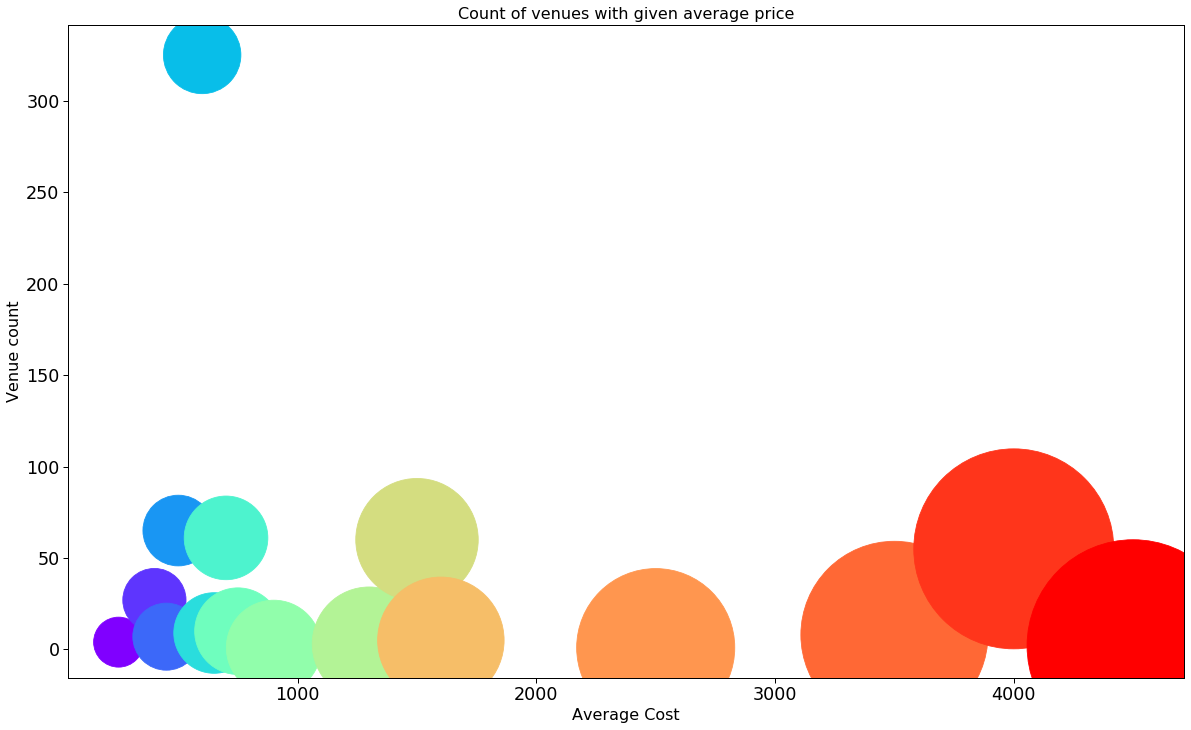

In [319]:
average_prices = zomato_venues['Average_cost'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Average Cost", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

From the plot above we can see that a large number of venues have an average price below Rs.1000.There are some expensive Indian Restaurants that are mostly in Five Star hotels.

### Ratings Plot

Text(0.5, 1.0, 'Count of venues with given rating')

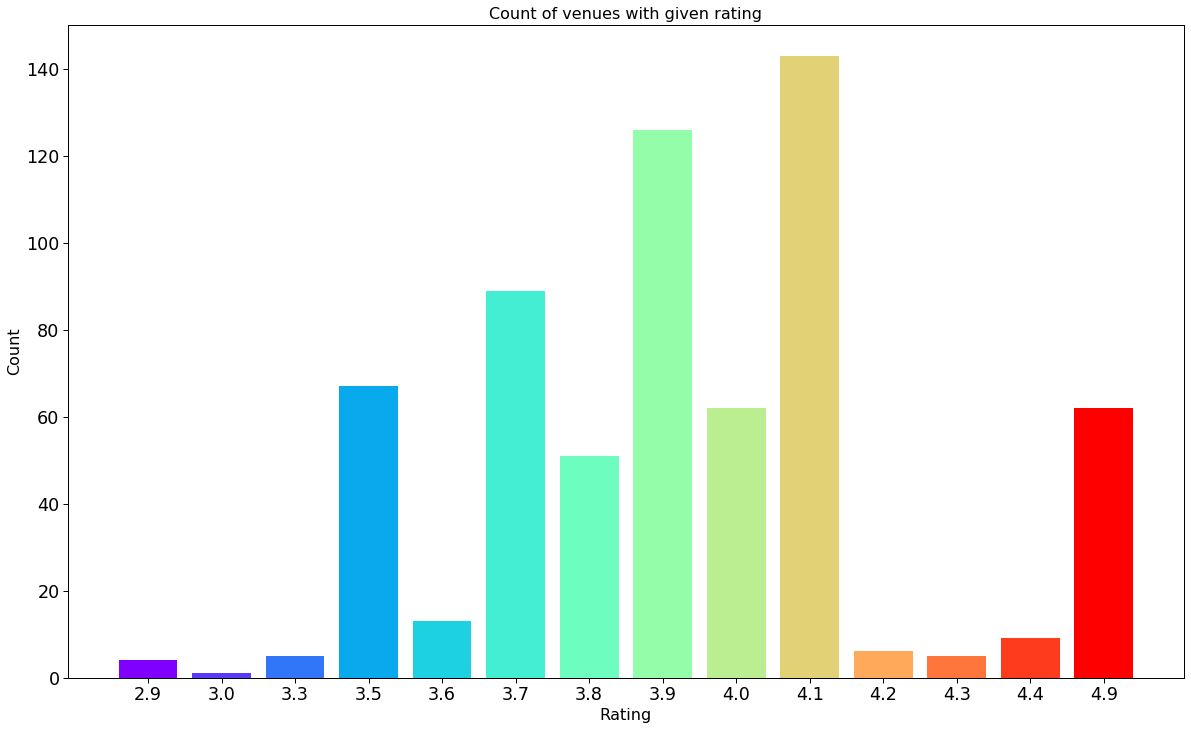

In [320]:
rating = zomato_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

From the plot above, it is clear that majority venues have their ratings betwen 3.7 and 4.1. There are a good amount of Indian restaurants in Gurgaon with a high rating of 4.9!

#### With this I conclude the project, I hope it has given some valuable insights to the readers. Cheers!